In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

## Importing train and test dataset

In [226]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EDA on train dataset

In [227]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [228]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [229]:
df_train.isnull().sum(axis=0)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

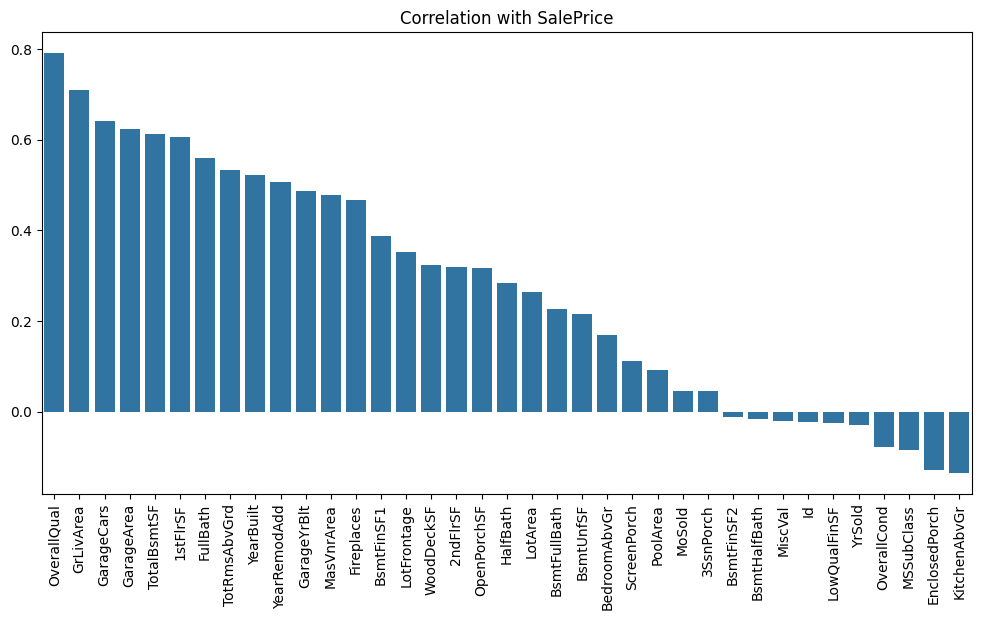

In [230]:
plt.figure(figsize=(12, 6))
plt.title("Correlation with SalePrice")
sns.barplot(df_train.drop(columns=["SalePrice"]).corrwith(df_train["SalePrice"], numeric_only=True).sort_values(ascending=False))
plt.xticks(rotation=90)
plt.show()

## Handling null values

In [231]:
train_numeric_cols = df_train.select_dtypes(include=["number"]).drop(columns=["SalePrice", "Id"]).columns
train_cetegory_cols = df_train.select_dtypes(include=["object"]).columns

test_numeric_cols = df_test.select_dtypes(include=["number"]).drop(columns=["Id"]).columns
test_cetegory_cols = df_test.select_dtypes(include=["object"]).columns


### LotFrontage
Based on the plot and values distribution I will use KNN Imputer

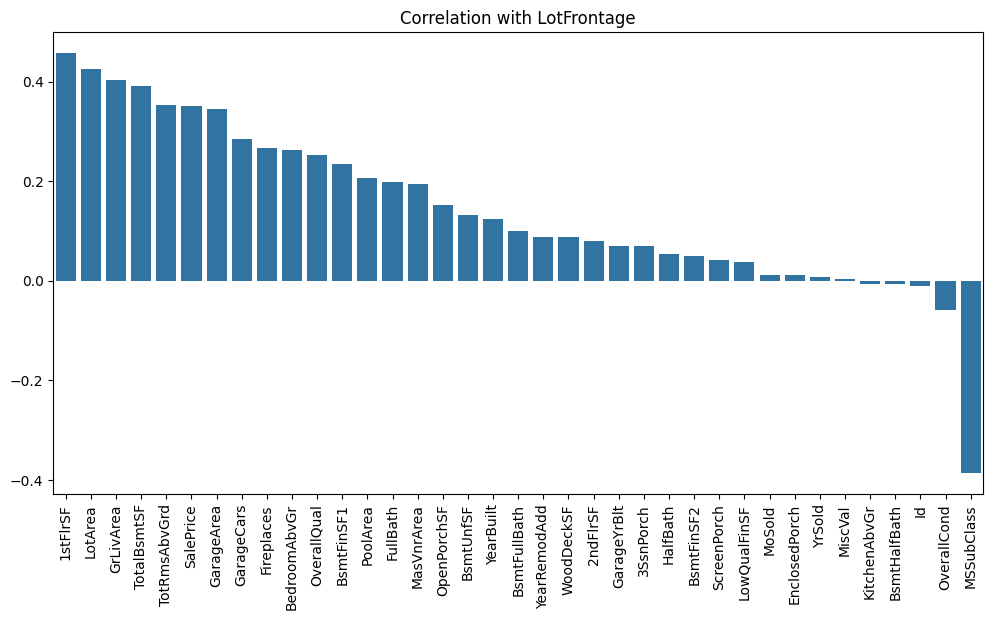

In [232]:
df_train[df_train['LotFrontage'].isnull()].head(2500)
plt.figure(figsize=(12, 6))
plt.title("Correlation with LotFrontage")
sns.barplot(df_train.drop(columns=["LotFrontage"]).corrwith(df_train["LotFrontage"], numeric_only=True).sort_values(ascending=False))
plt.xticks(rotation=90)
plt.show()

In [233]:
imputer = KNNImputer(n_neighbors=5)
df_train['LotFrontage'] = imputer.fit_transform(df_train[train_numeric_cols])[:, train_numeric_cols.get_loc('LotFrontage')]
df_test['LotFrontage'] = imputer.fit_transform(df_test[test_numeric_cols])[:, test_numeric_cols.get_loc('LotFrontage')]

### Alley

In [234]:
df_train['Alley'] = df_train['Alley'].fillna("NA")
df_test['Alley'] = df_test['Alley'].fillna("NA")


### MasVnrType

In [235]:

df_train['MasVnrType'] = df_train['MasVnrType'].fillna('NA')
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('NA')

### MasVnrArea

In [236]:
df_train[df_train['MasVnrArea'].isna()]['MasVnrType']

234     NA
529     NA
650     NA
936     NA
973     NA
977     NA
1243    NA
1278    NA
Name: MasVnrType, dtype: object

In [237]:
df_test[df_test['MasVnrArea'].isna()]['MasVnrType']

231     NA
246     NA
422     NA
532     NA
544     NA
581     NA
851     NA
865     NA
880     NA
889     NA
908     NA
1132    NA
1197    NA
1226    NA
1402    NA
Name: MasVnrType, dtype: object

In [238]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)

### Bsmt

In [239]:

df_train[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]]\
= df_train[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]].fillna("NA")

df_test[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]]\
= df_test[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]].fillna("NA")



In [240]:
df_train["Electrical"] = df_train["Electrical"].fillna(df_train["Electrical"].mode().iloc[0])
df_test["Electrical"] = df_test["Electrical"].fillna(df_test["Electrical"].mode().iloc[0])

### FireplaceQu

In [241]:
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("NA")
df_test["FireplaceQu"] = df_test["FireplaceQu"].fillna("NA")

In [242]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### GarageType, YrBlt, Finish, Qual, Cond

In [243]:
garage_categorical_cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]

In [244]:
df_train[df_train["GarageType"].isna()][garage_cols].head()

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN


In [245]:
df_test[df_test["GarageType"].isna()][garage_cols].head()

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
53,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN


In [246]:
df_train[garage_cols] = df_train[garage_cols].fillna("NA")
df_test[garage_cols] = df_test[garage_cols].fillna("NA")

In [247]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC